In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('Datasets/Train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:

prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 2654 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
21/21 [==============================] - 814s 39s/step - loss: 1.0317 - accuracy: 0.5991 - val_loss: 0.3619 - val_accuracy: 0.8357
Epoch 2/10
21/21 [==============================] - 823s 39s/step - loss: 0.5644 - accuracy: 0.7197 - val_loss: 0.3629 - val_accuracy: 0.8286
Epoch 3/10
21/21 [==============================] - 797s 38s/step - loss: 0.4811 - accuracy: 0.7751 - val_loss: 0.3167 - val_accuracy: 0.8750
Epoch 4/10
21/21 [==============================] - 800s 38s/step - loss: 0.4589 - accuracy: 0.7867 - val_loss: 0.3143 - val_accuracy: 0.8571
Epoch 5/10
21/21 [==============================] - 831s 40s/step - loss: 0.4380 - accuracy: 0.7931 - val_loss: 0.3059 - val_accuracy: 0.8857
Epoch 6/10
21/21 [==============================] - 890s 42s/step - loss: 0.4032 - accuracy: 0.8176 - val_loss: 0.2941 - val_accuracy: 0.8929
Epoch 7/10
21/21 [==============================] - 846s 40s/step - loss

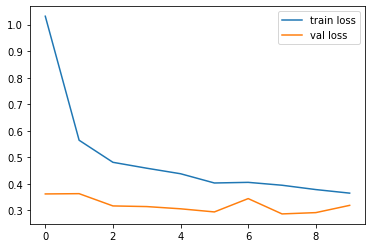

<Figure size 432x288 with 0 Axes>

In [15]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



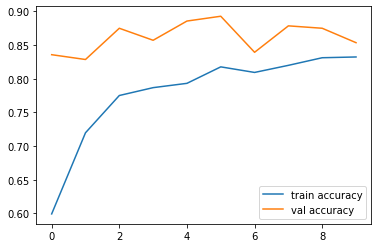

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [17]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')